# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10



**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 5 &mdash; 30 баллов
* Задача 6 &mdash; 35 баллов

-----

In [1]:
# Bot check

# HW_ID: phds_hw10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [12]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from tqdm import tqdm



### <b><font color="blue">Легкая часть</font></b>
### Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за легкую часть задания 3 и 6 весной 2024.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1CTOvQrxRpGEJG5vOIVYSPBfUzON5MAsnZeAUj3xxzFA/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



In [3]:
data = pd.read_csv("C:/Users/админ/Desktop/МатСтаты/датасеты/Успеваемость Ph@DS 2024 - ДЗ.csv")

In [4]:
data = data.drop(index= [0,1])

In [5]:
data

Unnamed: 0  ДЗ 1 Unnamed: 2 ДЗ 3 Unnamed: 4 ДЗ 4 Unnamed: 6  \
2           Акулинин Михаил     0        NaN    0          0    0          0   
3              Алеева Арина     0        NaN    0          0    0          0   
4    Александрова Анастасия    50        NaN   35          0    0          0   
5        Аль-Хадж Аюб Салех  79,5        NaN   56         60   87         43   
6             Андреева Анна    88        NaN   60         30   88         28   
..                      ...   ...        ...  ...        ...  ...        ...   
168          Ширшов Дмитрий    90        NaN   61          0   64          0   
169           Шляпин Виктор     0        NaN    0          0    0          0   
170          Шмырков Леонид    75        NaN    0          0    0          0   
171                Юка Элож     0        NaN    0          0    0          0   
172          Юшин Александр     0        NaN   70         60    0          0   

    ДЗ 5 Unnamed: 8 ДЗ 6 Unnamed: 10  
2      0          0    0           0  
3      0          0    0           0  
4      0          0    0           0  
5     76         58   30          46  
6    109         56   49           0  
..   ...        ...  ...         ...  
168  101          0   16           0  
169    0          0    0           0  
170    0          0    0           0  
171    0          0    0           0  
172    0          0    0           0  

[171 rows x 11 columns]

In [8]:
without_null1 = (data['ДЗ 3'])[data['ДЗ 3'] > 0]
without_null2 = (data['ДЗ 6'])[data['ДЗ 6'] > 0]

c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


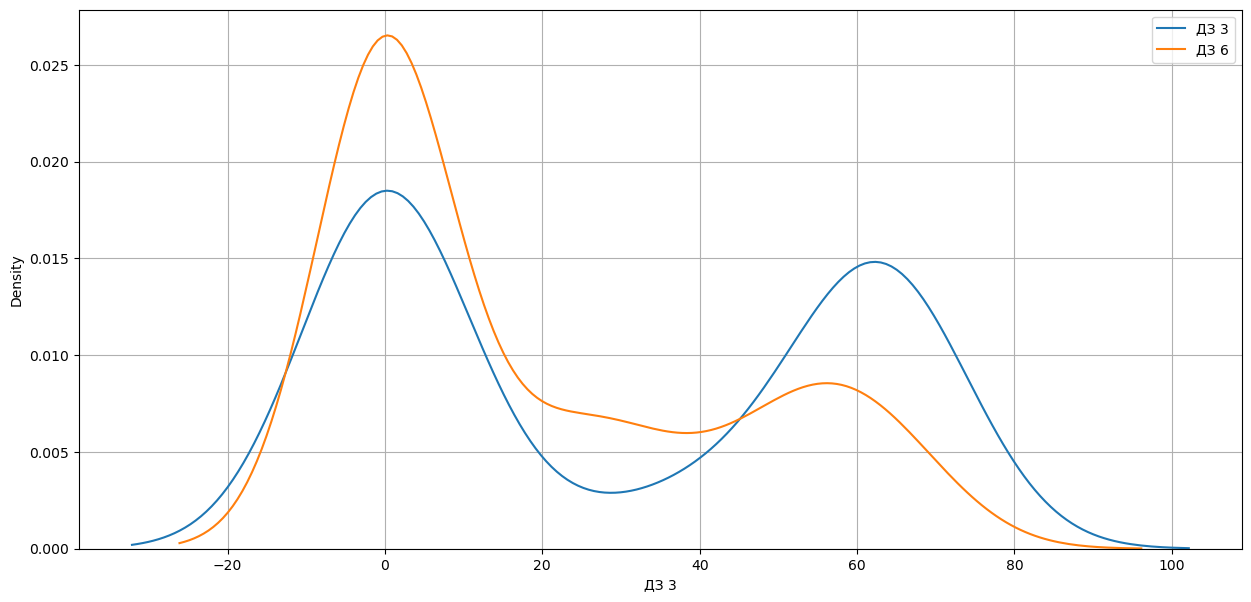

In [7]:
data['ДЗ 3'] = pd.to_numeric(data['ДЗ 3'], errors='coerce')
data['ДЗ 6'] = pd.to_numeric(data['ДЗ 6'], errors='coerce')
# построим сначала плотность всех баллов
plt.figure(figsize= (15,7))
sns.kdeplot(data= data['ДЗ 3'], label = 'ДЗ 3')
sns.kdeplot(data= data['ДЗ 6'], label = 'ДЗ 6')
plt.legend()
plt.grid()
plt.show()

c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


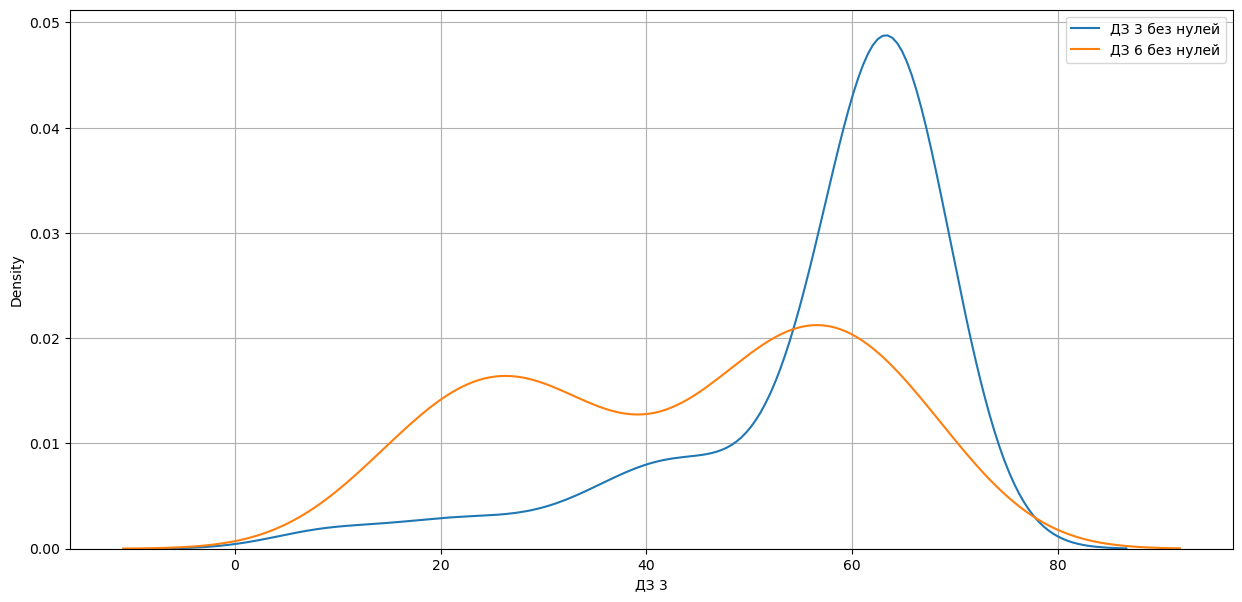

In [ ]:
# заметим, что о-о-очень много нулей, поэтому удалим их
plt.figure(figsize= (15,7))
sns.kdeplot(data= without_null1, label = 'ДЗ 3 без нулей')
sns.kdeplot(data= without_null2, label = 'ДЗ 6 без нулей')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(np.mean(without_null1))
print(np.mean(without_null2))
print(sps.ttest_rel(data['ДЗ 3'], data['ДЗ 6']))

56.55681818181818
43.398648648648646


TtestResult(statistic=6.682543787181759, pvalue=3.2196153255941033e-10, df=170)

Сделайте общий вывод по задаче.

**Вывод:**

Большое количество нулей не позволяет оценить среднее значение людей, которые проходят курс(ведь многие могли зарегистрироваться, но не ходить, или же бросить после 3ех дз). То есть нули портят общую картину, поэтому я их убрал. Теперь средний балл можно "угадать" графически(для большей точности всё таки нужно сделать оценку). По графикам видно, что средний балл за 3 задание находится около 60. В то время, как средний балл за 6 задание сдвинут к нулю(примерно 40-45). То есть сдвиг примерно на 15 баллов.

PS Вывод выше был написан на основе только графиков. Далее я сделал t-test, который включал нули, и получил маленькое значение p-value, что отвергает гипотезу о том, что среднии оценки равны.

### Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

In [75]:
df = pd.read_csv("C:/Users/админ/Desktop/МатСтаты/датасеты/Электронная ведомость 2023-2024 - Коллоквиум.csv")

In [133]:
df1 = df.iloc[:, 0:3].drop(index = 0)

In [236]:
df1['Группа'][30:45] = 'Б06-203'
df1['Группа'][56:72] = 'Б06-205'
grade_comp= pd.concat([df1[30:45], df1[56:72]])
grade_comp = grade_comp.replace({',': '.'}, regex=True)
grade_comp

Группа                                ФИО  Итог
31  Б06-203         Балакин Григорий Сергеевич  0.00
32  Б06-203        Бородулина Динара Антоновна  9.38
33  Б06-203                 Бос Мария Игоревна  9.13
34  Б06-203             Вахитова Дания Римовна  5.25
35  Б06-203        Волынчикова Мария Антоновна  8.63
36  Б06-203        Гребнева Анна Александровна  0.00
37  Б06-203           Ермилова Варвара Юрьевна  7.25
38  Б06-203            Каналина Мария Ивановна  0.00
39  Б06-203                Кладченко Александр  8.88
40  Б06-203         Космынин Никита Николаевич  0.00
41  Б06-203           Михно Елизавета Игоревна  6.00
42  Б06-203       Петрова Екатерина Алексеевна  9.75
43  Б06-203  Счастливцева Анастасия Максимовна  9.13
44  Б06-203       Чадина Наталья Александровна  9.75
45  Б06-203             Чесноков Юрий Павлович  9.13
57  Б06-205           Алиев Арсений Николаевич  6.63
58  Б06-205         Андреева Анна Владимировна  7.88
59  Б06-205       Ахметзянова Алина Руслановна  5.00
60  Б06-205      Блинкова Анастасия Леонидовна  9.13
61  Б06-205       Делинкевич Мария Ярославовна  8.50
62  Б06-205     Золотова Василиса Владимировна  7.88
63  Б06-205          Ларионов Захар Алексеевич  9.50
64  Б06-205         Макрушина Мария Алексеевна  5.00
65  Б06-205           Пискаева Виола Денисовна  8.88
66  Б06-205          Пискунова Ольга Сергеевна  9.75
67  Б06-205        Розынька Вероника Романовна  6.63
68  Б06-205          Самойлов Михаил Андреевич  6.88
69  Б06-205           Стрежнева Анна Романовна  9.50
70  Б06-205   Угрюмов Константин Александрович  9.38
71  Б06-205         Фолифорова Арина Сергеевна  6.88
72  Б06-205          Хохрякова Анна Алексеевна  8.75

c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


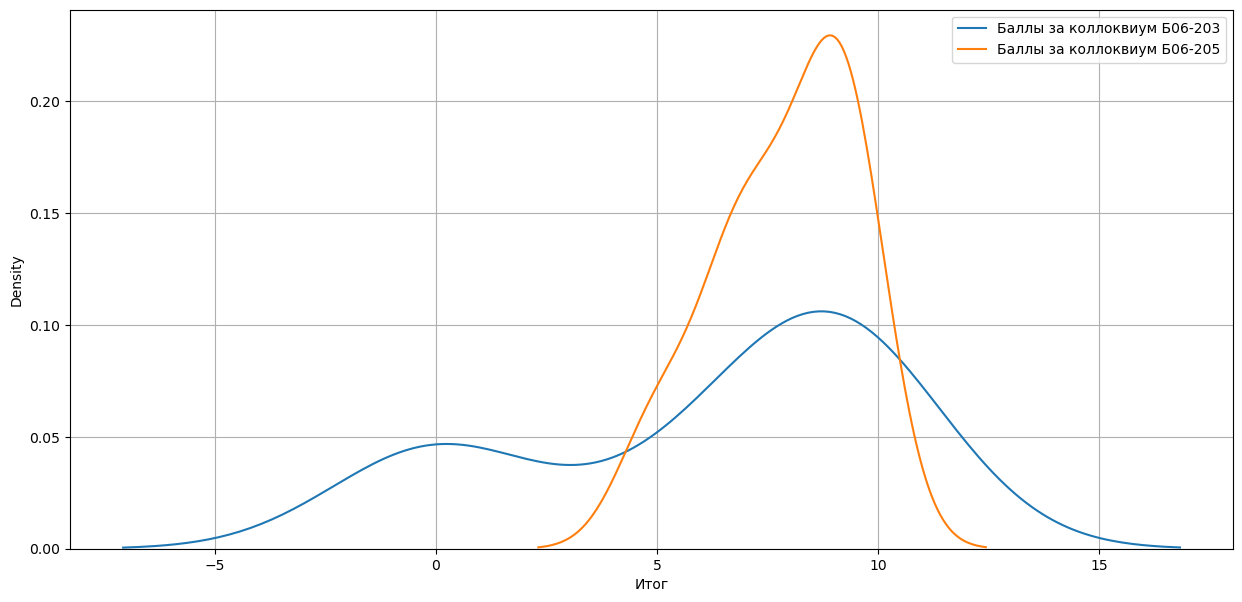

In [238]:
plt.figure(figsize= (15,7))
sns.kdeplot(data= grade_comp[0:15]['Итог'].astype(float), label ='Баллы за коллоквиум Б06-203')
sns.kdeplot(data= grade_comp[15:]['Итог'].astype(float), label ='Баллы за коллоквиум Б06-205')
plt.legend()
plt.grid()
plt.show()

In [228]:
sps.ttest_ind(grade_comp[0:15]['Итог'].astype(float), grade_comp[15:]['Итог'].astype(float))

TtestResult(statistic=-1.5916903712178192, pvalue=0.12229760051559932, df=29.0)

In [234]:
A_mean = np.mean((grade_comp[0:15]['Итог']).astype(float))
A_var =np.var((grade_comp[0:15]['Итог']).astype(float))
B_mean = np.mean((grade_comp[15:]['Итог']).astype(float))
B_var =np.var((grade_comp[15:]['Итог']).astype(float))

T = (A_mean-B_mean)/(A_var/14 -B_var/15)**0.5

alpha = 0.05
z = sps.norm.ppf(1- alpha/2)
T > z

False

**Вывод:**

В задании я рассмотрел баллы за коллоквиум по физической химии в разных семинарских группах. Попробовал сделать t-тест с различными группами. Результат везде был таков, что p-value>0.05. То есть нельзя сказать, что средний балл у одной группы отличается от другой.

По итогу для сравнения взял группы 203 и 205.

Pvalue показал, что гипотезу о том, что группы имеют одинаковые средние баллы нельзя отвергнуть. Результат не является статистически значимым.

### Задача 3


Предположим, что вы разработали лекарство от коронавируса. Перед применением оно обязательно должно пройти клинические испытания. Для начала было разрешено проверить лекарство на двух независимых группах по 10 человек. Одна группа принимает плацебо, другая &mdash; ваш препарат. Большее количество пациентов на первом этапе брать не разрешают &mdash; слишком велики риски отрицательного результата.

Для каждого пациента измерялось количество дней от приема препарата до выздоровления. Получились следуюшие результаты:

In [6]:
x = [6, 16, 8, 13, 9, 4, 7, 10, 3, 14]  # плацебо
y = [5, 10, 3, 1, 5, 3, 19, 2, 2, 5]  # лекарство

c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


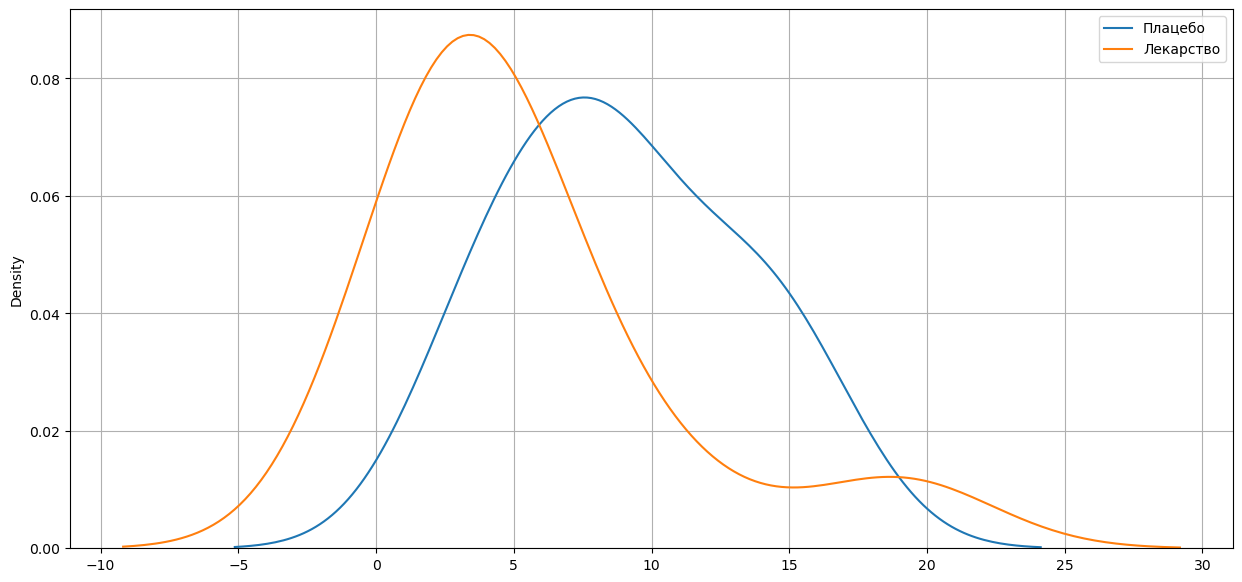

In [7]:
plt.figure(figsize= (15,7))
sns.kdeplot(data= x, label = 'Плацебо')
sns.kdeplot(data= y, label = 'Лекарство')
plt.legend()
plt.grid()
plt.show()

c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


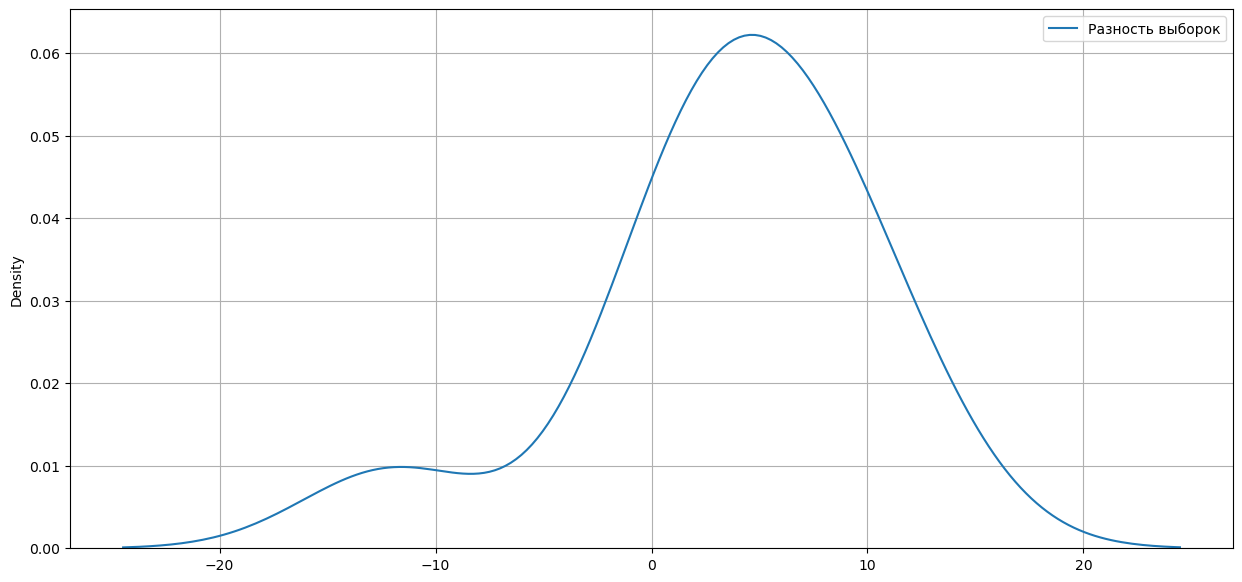

In [8]:
d = np.array(x)-np.array(y)
#построим график X-Y
plt.figure(figsize= (15,7))
sns.kdeplot(data= d, label = 'Разность выборок')
plt.legend()
plt.grid()
plt.show()

In [9]:
#считаем дисперсию и средние
mean_drug = np.mean(y)
var_drug = np.var(y)

mean_placebo = np.mean(x)
var_placebo = np.var(x)

mean_d =np.mean(d)
var_d = np.var(d)
print(f' Для препарата: \n Среднее: {mean_drug} \n Дисперсия: {var_drug} \n \n Для плацебо: \n Среднее: {mean_placebo} \n Дисперсия: {var_placebo} \n \n Для их разности: \n Среднее: {mean_d} \n Дисперсия: {var_d}')

 Для препарата: 
 Среднее: 5.5 
 Дисперсия: 26.05 
 
 Для плацебо: 
 Среднее: 9.0 
 Дисперсия: 16.6 
 
 Для их разности: 
 Среднее: 3.5 
 Дисперсия: 39.05


In [18]:
# Построим доверительный интервал:
alpha = 0.05
z = sps.norm.ppf(1-alpha/2)
conf_int =(mean_placebo - mean_drug) - z*var_d**0.5/(len(d))**0.5, (mean_placebo - mean_drug) + z*var_d**0.5/(len(d))**0.5
print(conf_int)

(-0.3730991072796672, 7.373099107279668)


In [11]:
#посчитаем p-value для разности выборок
theta = 0
statistic = np.sqrt(len(d)) * (mean_d - theta) / var_d**0.5
p_value = sps.norm.cdf(np.abs(statistic))
print(p_value)

0.9617328589708719


In [19]:
print(sps.ttest_rel(x, y)) # Предполагаем, что выборки зависимы

TtestResult(statistic=1.680268864529208, pvalue=0.12720674554368294, df=9)


Что вы можете сказать на основе этих результатов?
* Лекарство эффективнее, подтверждается статистическими методами;
* Наверное, лекарство эффективнее, но статистическими методами это пока не подтверждено, нужно продолжить эксперимент. Подумайте, как обосновать необходимость продолжение эксперимента;
* По результатам эксперимента нельзя сделать какой-либо вывод. Стоит ли продолжать эксперименты? Если да, то четко это обоснуйте;
* Лекарство неэффективно, нужно немедленно прекращать эксперимент.

**ВЫВОД**
Выше были посчитаны некоторые значения и построены графики. T-test показал, что p-value имеет высокое значение(p-value =0.127). То есть мы не можем отвергнуть то, что средние выборок равны. Поэтому результат не является статистически значим.

Аналогично для разности выборок. Я получил p-value = 0.96. 

При этом получился огромный интервал, в который входит оценка. А также если взглянуть на средние значения, то видно, что для разности выборок она ненулевая. Получается, что есть некоторая надежда, что препарат эффективнее плацебо.

Проблемы перечисленные выше связаны с тем, что у выборок очень большая дисперсия. Поэтому невозможно статистическими методами подтвердить эффективность препарата. При этом среднее значение показывает то, что препарат может быть эффективным.

Считаю, что нужно продолжить эксперимент, чтобы ответить на вопрос об эффективности. В данный момент из-за маленькой выборки и большой дисперсии сказать что-то определённое невозможно.

PS Скорее всего нужно использовать бутстрепный тест, т.к. распределения несколько отличаются от нормальных.

### Задача 4

Пусть $X=(X_1, \dots, X_n)$, $Y=(Y_1, \dots, Y_m)$ - независимые выборки из нормального распределения.

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$.

C помощью t-test проверяется пара гипотез

$$\mathsf{H}_0\colon EX_1 = 0 \text{ vs } \mathsf{H}_1\colon EX_1 < 0$$

$$\mathsf{H}_0\colon EY_1 = 0 \text{ vs } \mathsf{H}_1\colon EY_1 > 0$$

Оцените реальный уровень значимости процедуры, если обе гипотезы проверяются на уровне $\alpha=0.05$. Совпадает ли он с $\alpha$? Предложите способ сделать так, чтобы он был равен $\alpha$.

In [83]:
is_reject_X = 0
is_reject_Y = 0
alpha = 0.05

X = sps.norm.rvs(loc = 0, scale = 5, size = (5000, 200))
Y = sps.norm.rvs(loc = 0, scale = 3, size = (5000, 300)) 
for i in range(5000):
        _, pvalue_X = sps.ttest_1samp(X[i], 0, alternative='less')
        if pvalue_X < alpha:
            is_reject_X += 1
for i in range(5000):
        _, pvalue_Y = sps.ttest_1samp(Y[i], 0, alternative='greater')
        if pvalue_Y < alpha:
            is_reject_Y += 1

real_alpha_X = is_reject_X/5000
real_alpha_Y = is_reject_Y/5000
print(f' Реальный уровень значимости для X: {round(real_alpha_X, 4)} \n Реальный уровень значимости для Y: {round(real_alpha_Y, 4)}')

 Реальный уровень значимости для X: 0.0492 
 Реальный уровень значимости для Y: 0.0488


Я провёл АА тест, который показал, что $\alpha_r< \alpha$, что говорит о том, что мощность критерия стала меньше. То есть нужно как-то увеличить мощность критерия или использовать другой в данной задаче(с большим количеством выборок).

### <b><font color="orange">Сложная часть</font></b>

### Задача 5


#### Профиль биология


Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [54]:
path = "C:/Users/админ/Desktop/МатСтаты/датасеты/Data_Cortex_Nuclear.csv"
data = pd.read_csv(path)
data.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

Выведем описательные статистики по вещественным параметрам.

In [55]:
data.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

Количество записей по генотипам:

In [56]:
data.Genotype.value_counts()

Genotype
Control    570
Ts65Dn     510
Name: count, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

In [57]:
first_10 = pd.concat([data.iloc[:, 0:10], data['Genotype']], axis = 1)

In [58]:
first_10

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N Genotype  
0     0.177565   2.373744  0.232224  Control  
1     0.172817   2.292150  0.226972  Control  
2     0.175722   2.283337  0.230247  Control  
3     0.176463   2.152301  0.207004  Control  
4     0.173627   2.134014  0.192158  Control  
...        ...        ...       ...      ...  
1075  0.171262   2.483740  0.207317   Ts65Dn  
1076  0.182496   2.512737  0.216339   Ts65Dn  
1077  0.161435   1.989723  0.185164   Ts65Dn  
1078  0.173623   2.086028  0.192044   Ts65Dn  
1079  0.191811   2.361816  0.223632   Ts65Dn  

[1080 rows x 11 columns]

c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

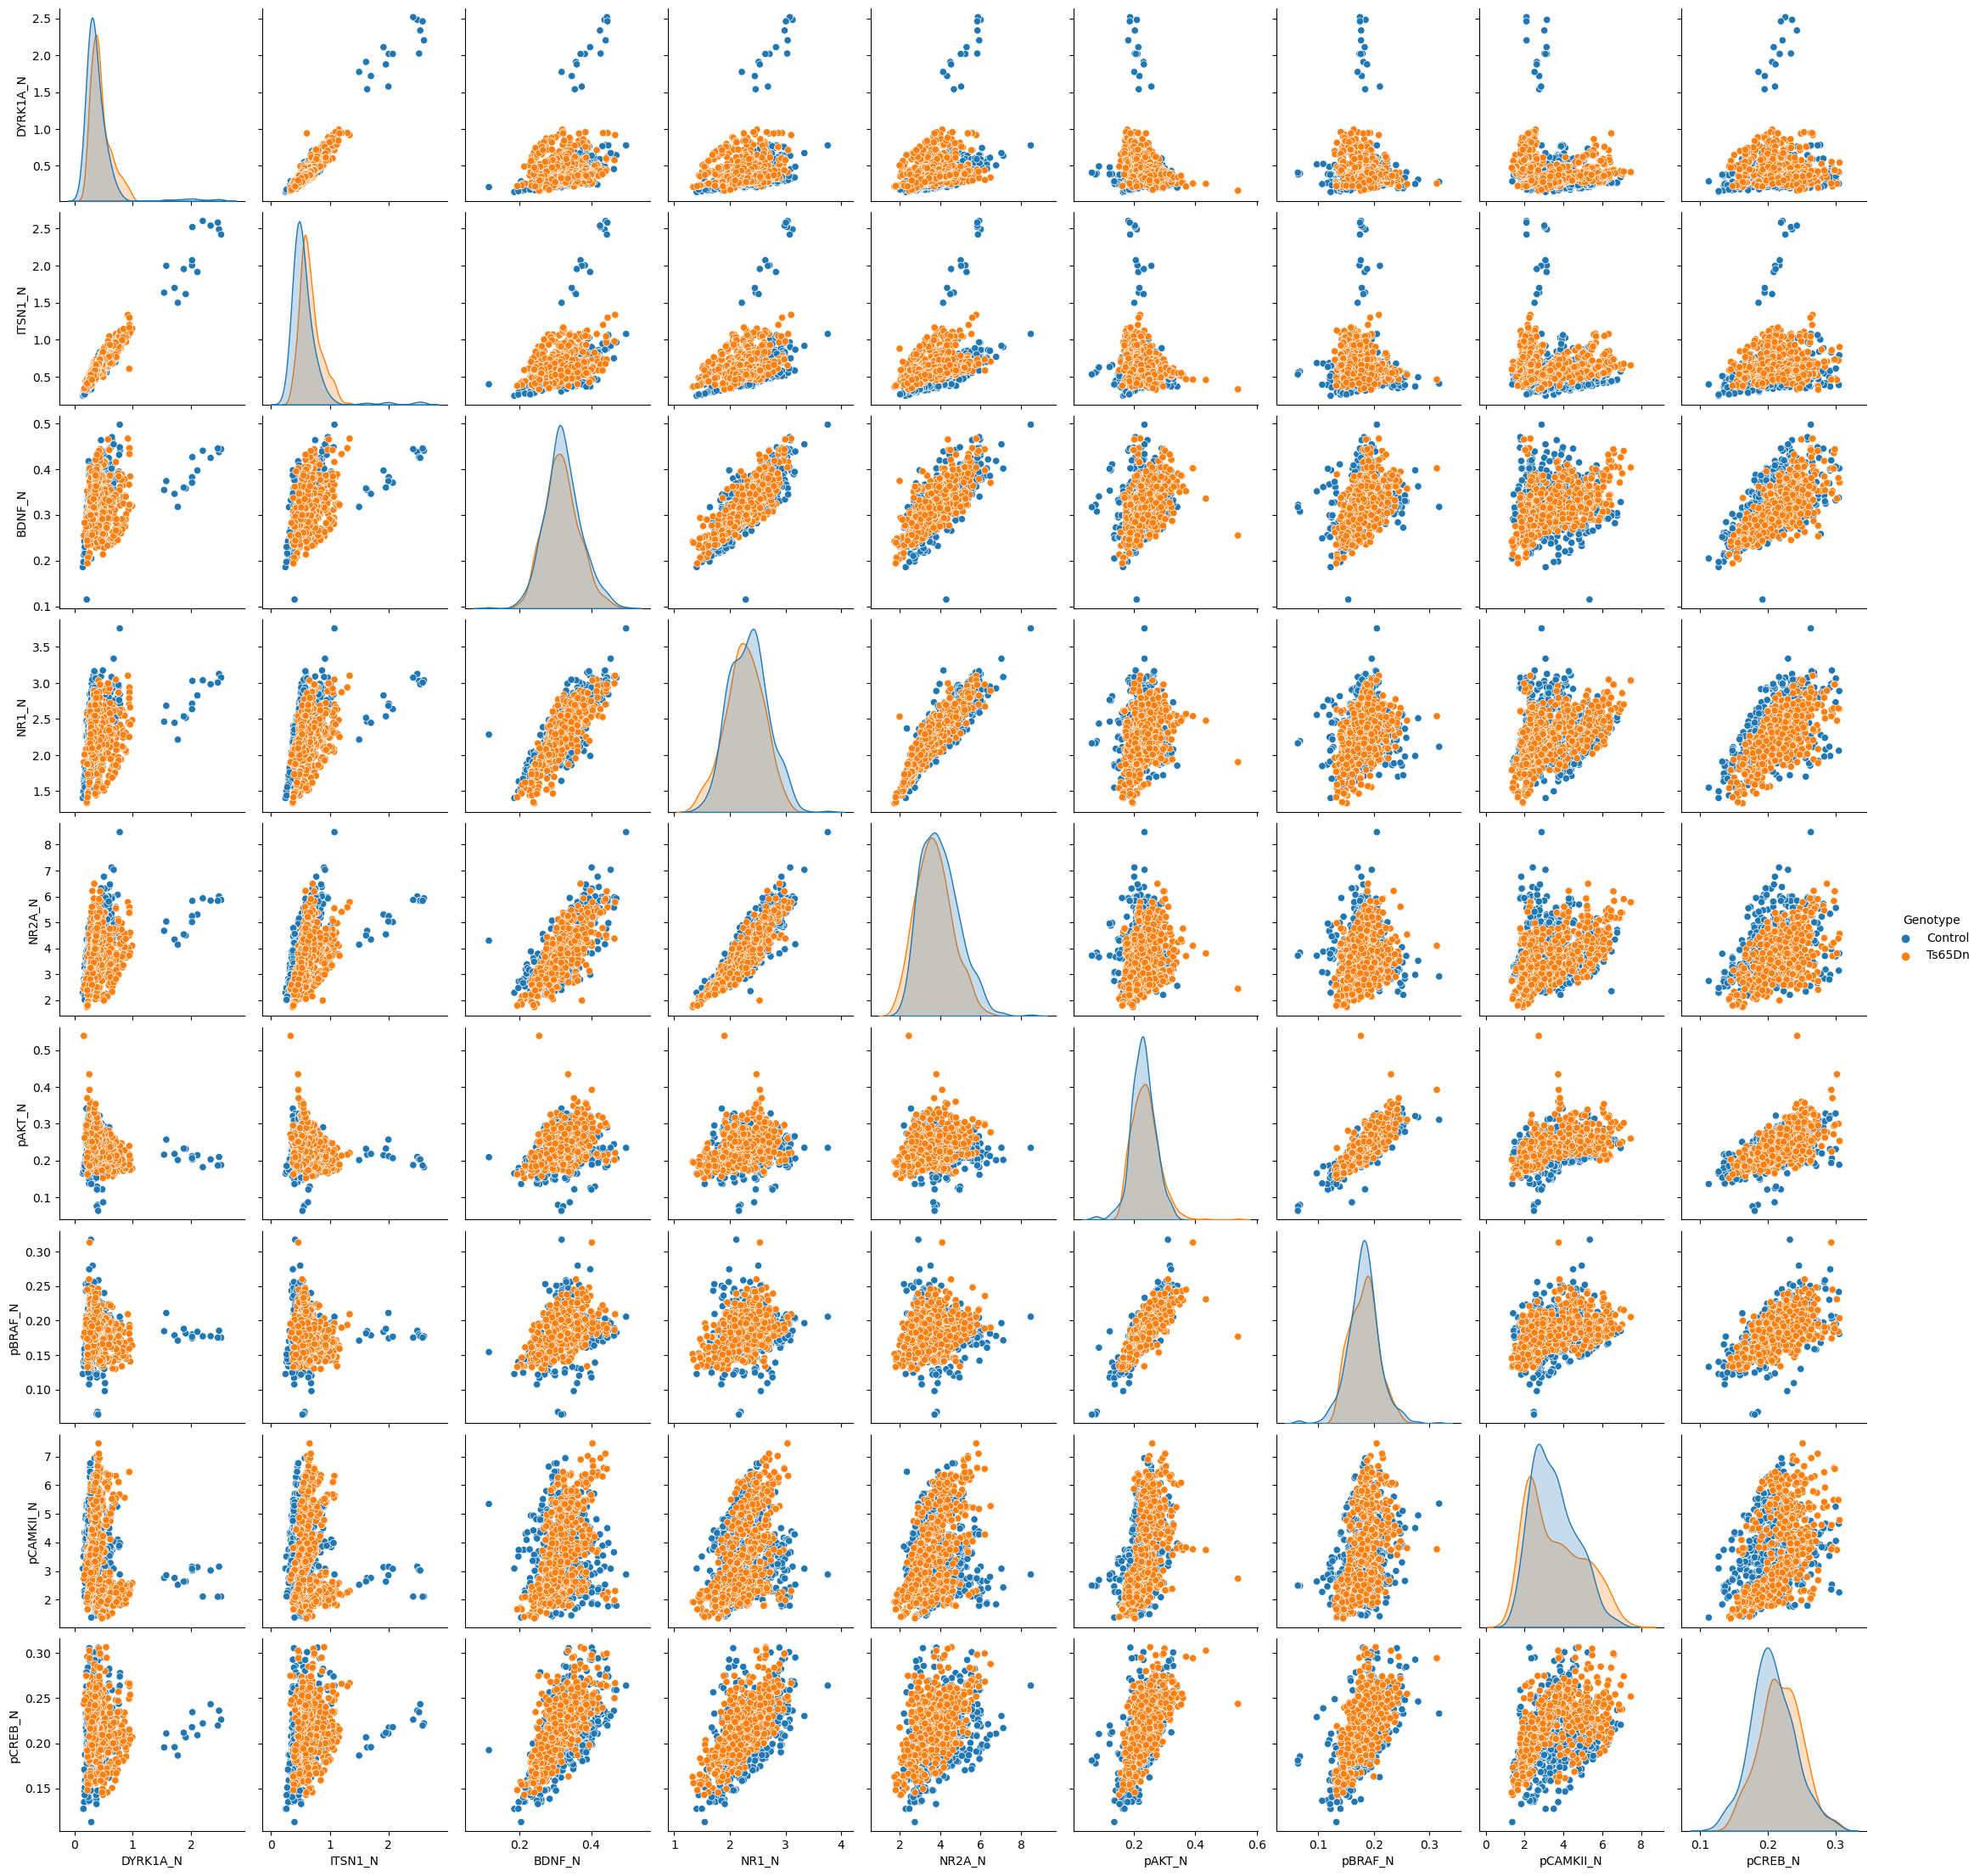

In [59]:
sns.pairplot(first_10, hue='Genotype')

Визуализируйте двумерные проекции данных и гистограммы с использованием `sns.PairGrid` отдельно по генотипам для 10 признаков. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета, подробнее можно почитать в [документации](https://seaborn.pydata.org/generated/seaborn.PairGrid.html). 

c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\laba\Lib\site-packages\seaborn\distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)
c:\Anaconda\envs\laba\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Anaconda\envs\laba\Lib\site-packages\seabor

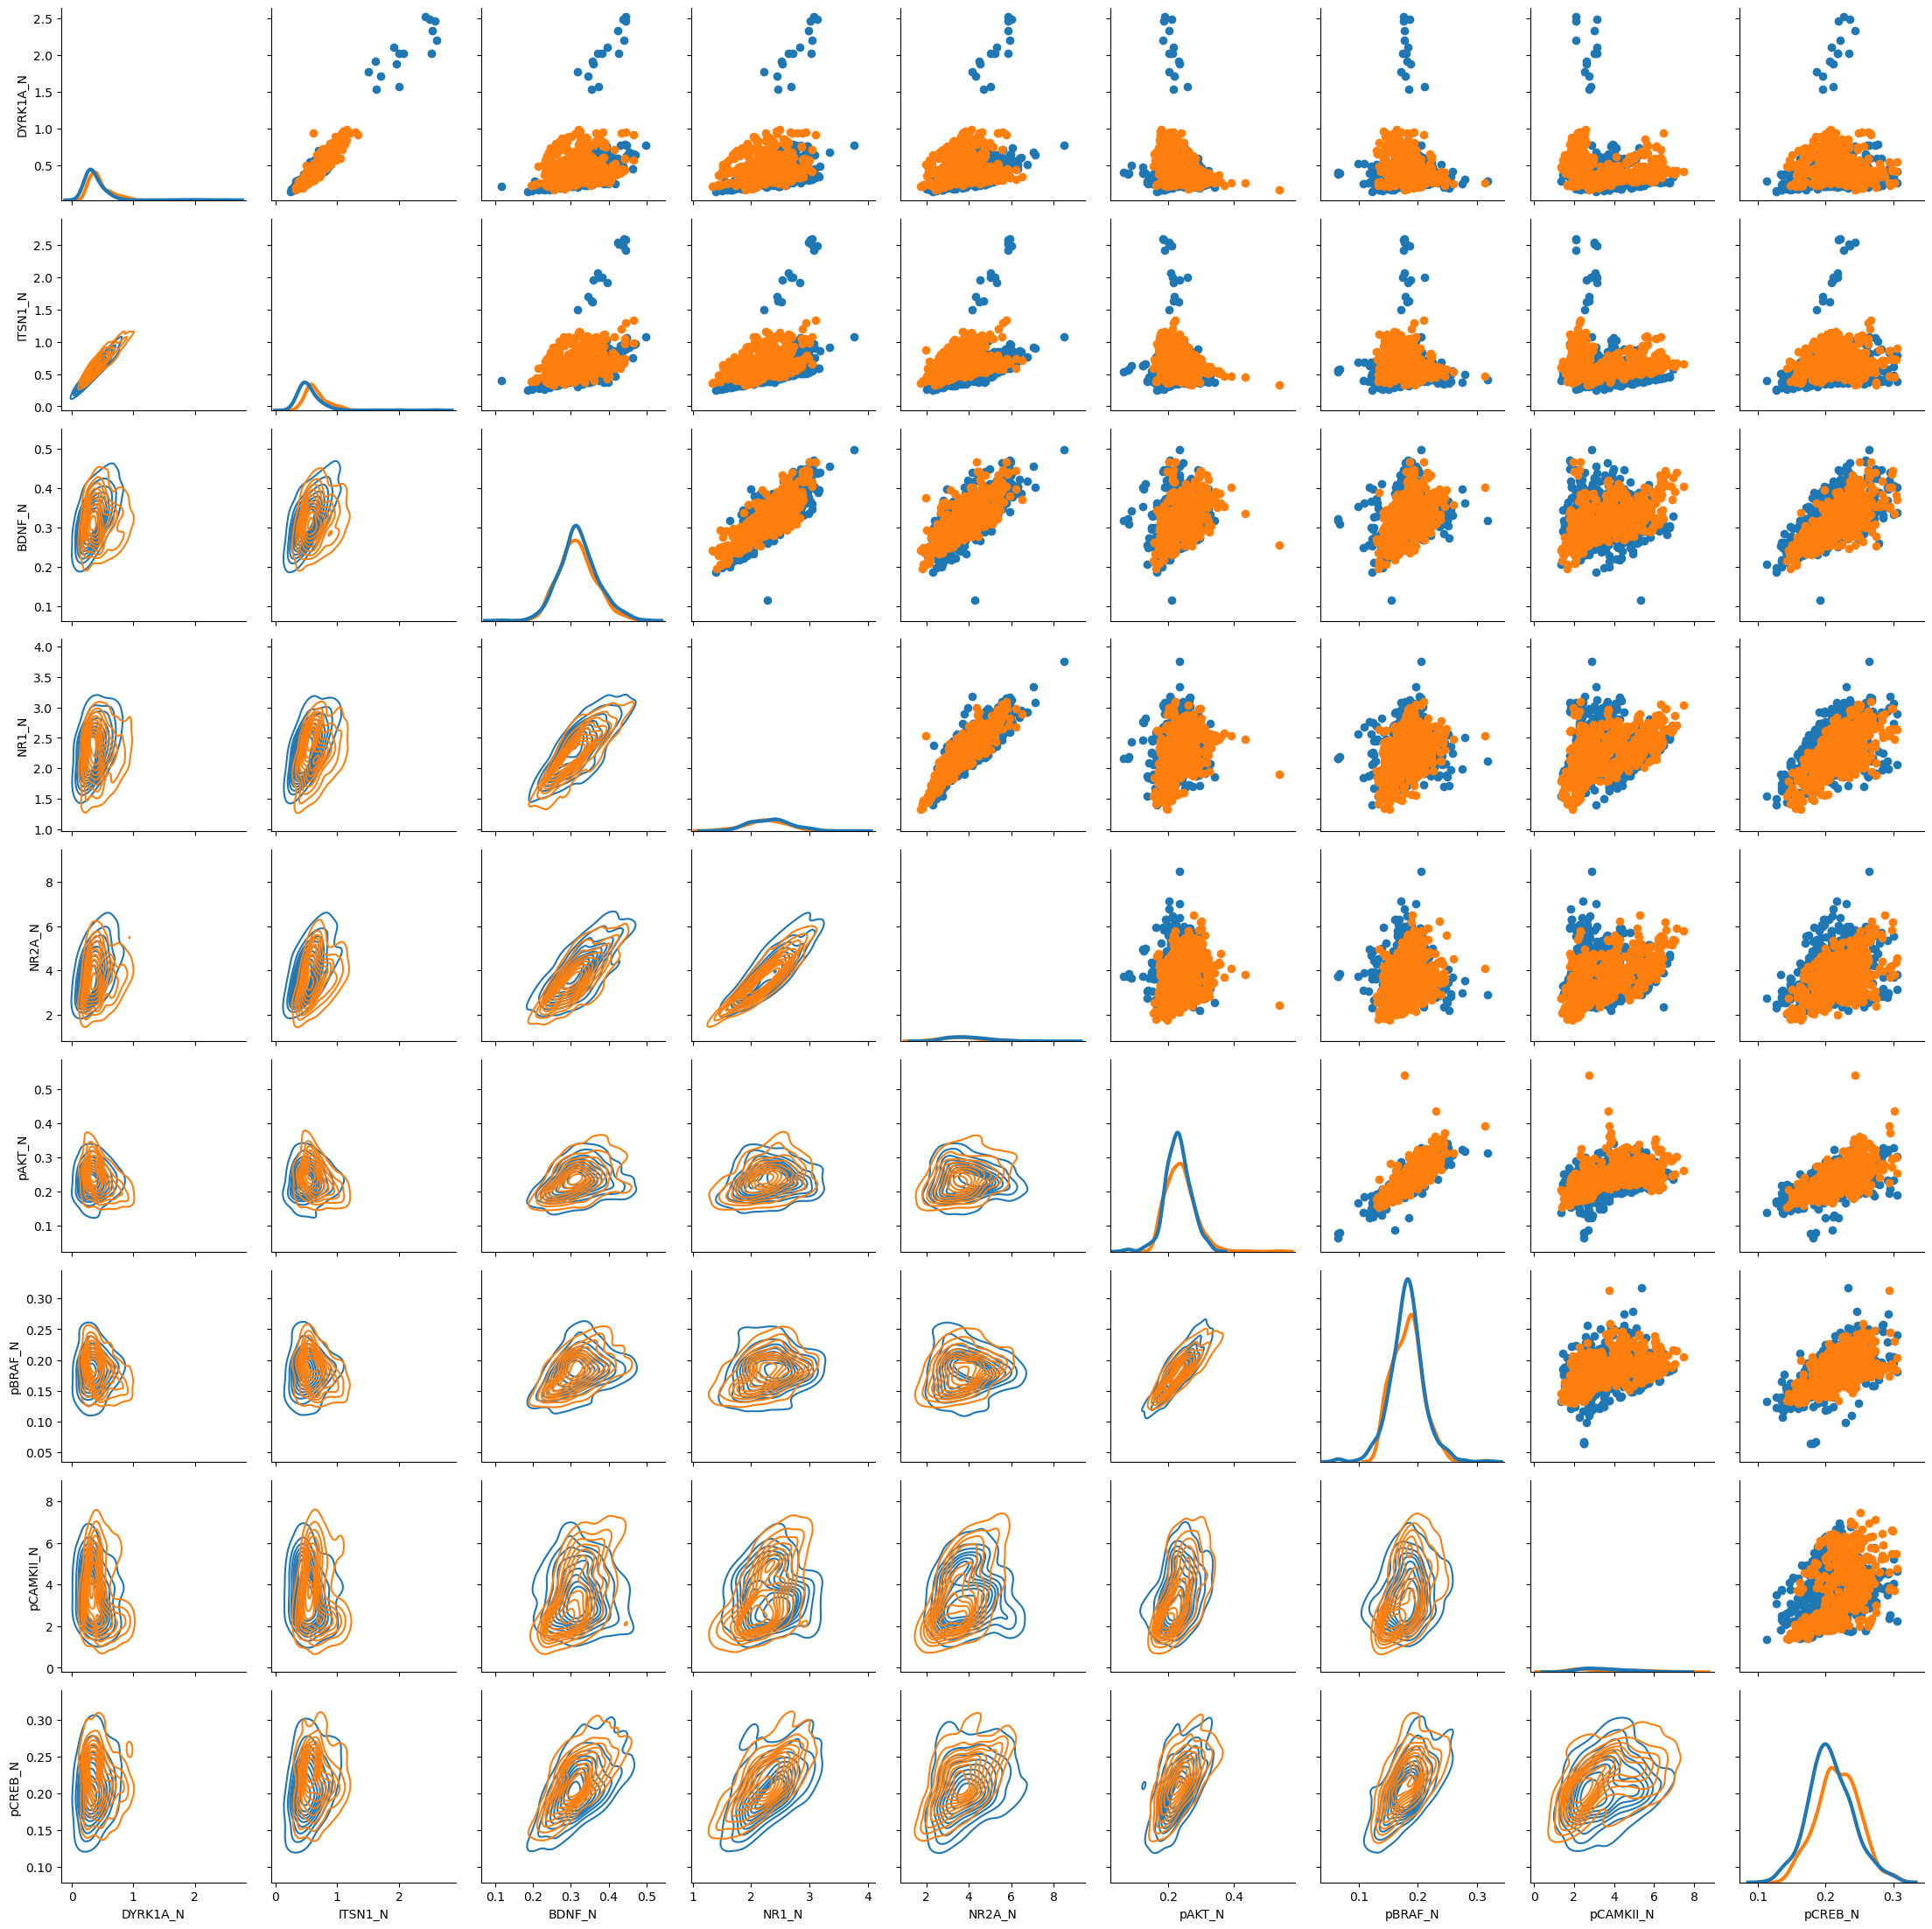

In [60]:
g = sns.PairGrid(first_10, hue='Genotype')
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

##### 1. Зависимость распределения DYRK1A_N от генотипа

Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента.  В реальных исследованиях нужно использовать конкретную альтернативу. 

Сделайте выводы.

In [62]:
Control = first_10[first_10['Genotype'] == 'Control'].iloc[0:507]
Ts65Dn = first_10[first_10['Genotype'] == 'Ts65Dn'].dropna()
sps.ttest_rel(Control['DYRK1A_N'], Ts65Dn['DYRK1A_N'])

TtestResult(statistic=-1.7462759176200888, pvalue=0.08136985220245826, df=506)

**Вывод**

Р-value имеет маленькое значение, но всё ещё больше, чем 0.05. Поэтому нельзя отвергнуть гипотезу о равенстве средних. Результат не является статистически значимым, хотя есть некоторое статистическое подтверждение, что нулевая гипотеза может быть отвергнута.

Посчитайте реализацию доверительного интервала величины сдвига. 


In [63]:
delt =  Ts65Dn['DYRK1A_N'].to_numpy() - Control['DYRK1A_N'].to_numpy()
mean_delt = np.mean(delt)
var_delt = np.var(delt)

alpha = 0.05
z = sps.norm.ppf(1-alpha/2)

conf_int = round(mean_delt - z*var_delt**0.5/np.sqrt(len(delt)), 4), round(mean_delt + z*var_delt**0.5/np.sqrt(len(delt)), 4)
print('Доверительный интервал:',conf_int)
print('Оценка сдвига:', round(mean_delt, 4))

Доверительный интервал: (-0.0031, 0.0534)
Оценка сдвига: 0.0252


##### 2. Зависимость распределения  BDNF_N от генотипа


Проверьте гипотезу о равенстве средних с использованием критерия Стьюдента при различных альтернативах, посчитайте оценку сдвига и доверительный интервал. Сделайте выводы. 

In [250]:
delt = Control['BDNF_N'].to_numpy() - Ts65Dn['BDNF_N'].to_numpy()
mean_delt = np.mean(delt)
var_delt = np.var(delt)

alpha = 0.05
z = sps.norm.ppf(1-alpha/2)
#Считаем доверительный интервал
conf_int_side = round(mean_delt - z*var_delt**0.5/np.sqrt(len(delt)), 4), round(mean_delt + z*var_delt**0.5/np.sqrt(len(delt)), 4)
conf_int_l = -np.inf, round(mean_delt + z*var_delt/np.sqrt(len(delt)), 4)
conf_int_r = round(mean_delt + z*var_delt/np.sqrt(len(delt)), 4), np.inf


theta = 0
statistic = np.sqrt(len(d)) * (mean_d - theta) / var_d**0.5

p_value_side = sps.norm.sf(np.abs(statistic)) + sps.norm.cdf(-np.abs(statistic))
p_value_l = sps.norm.cdf(np.abs(statistic))
p_value_r = sps.norm.sf(statistic)

print(f' pvalue для различных альтернатив: \n Левосторонняя:{p_value_l} \n Правосторонняя: {p_value_r} \n Двусторонняя: {p_value_side}')
print(f'\n доверительный интервал для различных альтернатив: \n Левосторонняя:{conf_int_l} \n Правосторонняя: {conf_int_r} \n Двусторонняя: {conf_int_side}')
print(f'\n Посчитаем оценку сдвига: {round(np.mean(delt), 4)}')

 pvalue для различных альтернатив: 
 Левосторонняя:0.9617328589708719 
 Правосторонняя: 0.038267141029128045 
 Двусторонняя: 0.07653428205825609

 доверительный интервал для различных альтернатив: 
 Левосторонняя:(-inf, 0.0065) 
 Правосторонняя: (0.0065, inf) 
 Двусторонняя: (0.0001, 0.0122)

 Посчитаем оценку сдвига: 0.0061


**Вывод:** 

На основании pvalue для различных альтернатив можно сделать следующий вывод:
Правосторонняя альтернатива принимается, т.к. отвергается нулевая гипотеза, что оценка равна нулю. Для двусторонней гипотезы есть некоторые основания, что оценка отлична от нуля, но для установленного уровня значимости 0.05 эта гипотеза не принимается. 

Для левосторонней гипотезы достаточно логично, что pvalue много больше нуля, т.к. доверительный интервал лежит в отрицательной области.

Как связаны доверительные интервалы с проверкой гипотез? Подтверждается ли это в данном примере?

**Ответ:**

Доверительные интервалы это диапазон значений, который с большой вероятностью содержит истинное значение. Если оценка попадает в интервал, то значит, что эта оценка имеет место быть.

В этом задании мы отвергали нулевую гипотезу с большой уверенностью в пользу правосторонней альтернативы по значению pvalue, что имеет место быть, т.к. её границы лежат в положительной области(то есть ноль не входит).

Для двусторонней альтернативы мы имеем некоторые основания, что можно отвергнуть нулевую гипотезу, однако, как было сказано ранее, для установленного уровня значимости гипотеза всё ещё не отвергается. При этом границы двусторонней гипотезы положительны, то есть ноль туда не входит. Однако левая граница очень близка к нулю(10^-4 это всё таки близко к нулю), что и делает эту альтернативу менее привлекательной, т.к. уверенность в её результате маленький.

Для левосторонней альтернативы мы не отвергаем нулевую гипотезу, т.к. большой pvalue. При этом ноль входит в доверительный интервал, что делает эту альтернативу крайне нежелательной(на 0.96 нежелательной). 

Как видно, доверительный интервал тесно связан со значением pvalue, т.к. от того, как близко расположен ноль к доверительному интервалу и входит ли ноль в интервал, зависит значение pvalue. 



### Задача 6

Это задание является продолжением задачи 5 из прошлого домашнего задания. Здесь вам необходимо наглядно сравнить два критерия из предыдущей задачи. Для этого прооделайте все пункты для обоих критериев. Обязательно подписывайте какой график к какому критерию относится.


**1.** **Оцените реальный уровень значимости** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

In [ ]:
...

**Вывод:**...

**2.** Для значений $n \in \{5, 15, 30, 50, 100\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.25 по методу Монте-Карло. Визуализируйте полученные зависимости. Посчитайте также мощность критерия по асимптотической формуле, полученной на лекции, и сравните с оценкой мощности методом Монте-Карло. Учтите, что асимптотическая формула содержит $n$, поэтому для нее тоже должно быть три зависимости.

In [ ]:
...

**Вывод:**...

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta \in (0, 5)$ по сетке с шагом 0.25.

In [ ]:
...

**Вывод:**...

Сделайте общий вывод по сравнению двух критериев.

**Вывод:**